In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

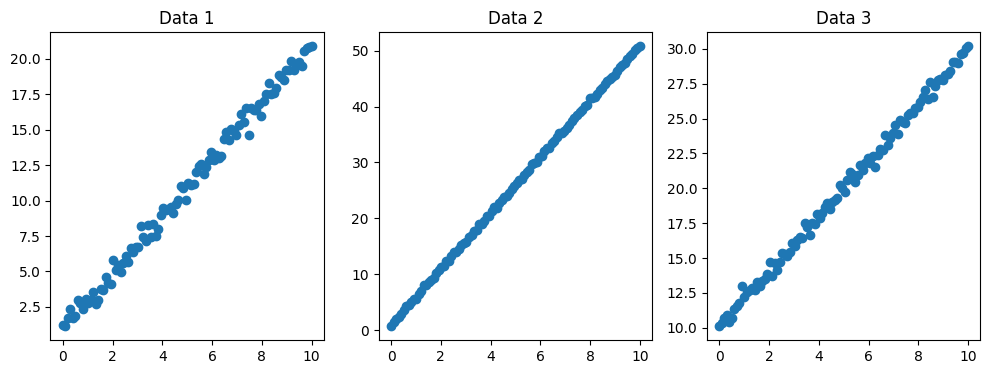

In [ ]:
# Создание трех датасетов с «качественными» данными
np.random.seed(42)


def make_linear_data(n=100, slope=2.0, intercept=1.0, noise=1.0):
    xs = np.linspace(0, 10, n)
    ys = slope * xs + intercept + np.random.randn(n) * noise
    return pd.DataFrame({"x": xs, "y": ys})


# Три датасета с разными наклонами и шумом
df1 = make_linear_data(noise=0.5)
df2 = make_linear_data(slope=5, noise=0.2)
df3 = make_linear_data(intercept=10, noise=0.3)

# Визуализация для проверки
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for df, ax, title in zip(
    [df1, df2, df3], axes, ["Data 1", "Data 2", "Data 3"]
):
    ax.scatter(df.x, df.y)
    ax.set_title(title)
plt.show()

In [ ]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(df1[["x"]], df1["y"])

print(f"coef={model.coef_[0]:.3f}, intercept={model.intercept_:.3f}")

coef=2.007, intercept=0.914


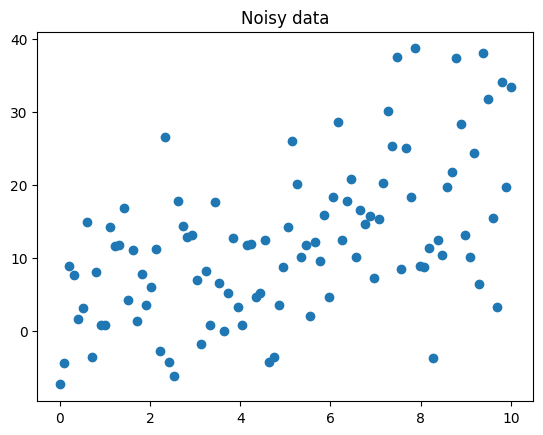

In [ ]:
# Создание датасета с шумом в данных
df_noise = make_linear_data(noise=10.0)

plt.scatter(df_noise.x, df_noise.y)
plt.title("Noisy data")
plt.show()

In [27]:
%%writefile test_model_quality.py
import numpy as np
import pandas as pd
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Тестирование работы модели на разных датасетах с использованием pytest
def make_linear_data(n=100, slope=2.0, intercept=1.0, noise=1.0):
    """Генерирует линейный датасет."""
    xs = np.linspace(0, 10, n)
    ys = slope * xs + intercept + np.random.randn(n) * noise
    return pd.DataFrame({"x": xs, "y": ys})


@pytest.fixture(
    params=[
        {"noise": 0.5, "max_mse": 1.0},
        {"slope": 5, "noise": 0.2, "max_mse": 1.0},
        {"intercept": 10, "noise": 0.3, "max_mse": 1.0},
    ]
)
def clean_data(request):
    """Фикстура pytest для создания "чистых" датасетов."""
    p = request.param
    max_mse = p["max_mse"]
    df = make_linear_data(
        n=p.get("n", 100),
        slope=p.get("slope", 2.0),
        intercept=p.get("intercept", 1.0),
        noise=p["noise"],
    )
    return df, max_mse


def test_regression_on_clean(clean_data):
    """
    Тест модели LinearRegression на чистых данных.
    Ожидает, что MSE будет меньше порогового значения.
    """
    df, max_mse = clean_data
    model = LinearRegression().fit(df[["x"]], df["y"])
    preds = model.predict(df[["x"]])
    mse = mean_squared_error(df["y"], preds)
    assert (
        mse < max_mse
    ), f"Ошибка: MSE слишком велико на чистых данных: {mse:.2f}"


def test_regression_on_noisy():
    """
    Тест модели LinearRegression на шумных данных.
    Ожидается, что MSE будет достаточно большим (>20).
    """
    dfn = make_linear_data(noise=10.0)
    model = LinearRegression().fit(dfn[["x"]], dfn["y"])
    preds = model.predict(dfn[["x"]])
    mse = mean_squared_error(dfn["y"], preds)
    # на шумном датасете ожидаем плохое качество
    assert mse > 20, (
        "Ошибка: ожидалось высокое значение MSE на ",
        f"шумных данных, получено {mse:.2f}",
    )

Writing test_model_quality.py


In [28]:
! pytest

============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.5, pluggy-1.6.0
rootdir: /Users/pussykiller/Учеба/Семестр 2/Автоматизация МО/MLOps_labworks/lab5
plugins: hydra-core-1.3.2
collected 4 items                                                              

test_model_quality.py ....                                               [100%]

============================== 4 passed in 0.70s ===============================
